# This is Titanic Dataset in which we are predicting the whether the People survived or not using Logistic Regression

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# 2) Loading of datasets into Pandas DataFrame

In [2]:
train_df = pd.read_csv('train.csv',index_col='PassengerId')
test_df = pd.read_csv('test.csv',index_col='PassengerId')

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# 3) Preprocessing of Training and Testing data

In [7]:
train_df.drop(['Name','Cabin','Embarked','Ticket'], axis = 1, inplace=True)
test_df.drop(['Name','Cabin','Embarked','Ticket'], axis = 1, inplace=True)

In [8]:
labelencoder = LabelEncoder()

In [9]:
Sexs = labelencoder.fit_transform(train_df['Sex'])
sexs = labelencoder.fit_transform(test_df['Sex'])

In [10]:
train_df ['Sex'] = Sexs
test_df['Sex'] =sexs

In [11]:
train_df['Age'].mean()

29.69911764705882

In [12]:
test_df['Age'].mean()

30.272590361445783

In [13]:
test_df['Fare'].mean()

35.627188489208635

In [14]:
train_df['Age'].fillna(29.69,inplace=True)
test_df['Age'].fillna(30.27,inplace=True)
test_df['Fare'].fillna(35.62,inplace=True)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 52.2 KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 21.2 KB


# 4) Data Visualization using Seaborn

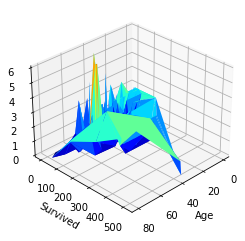

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(train_df['Age'], train_df['Fare'], train_df['Parch'], cmap=plt.cm.jet, linewidth=0.01)
ax.view_init(30,45)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

<AxesSubplot:>

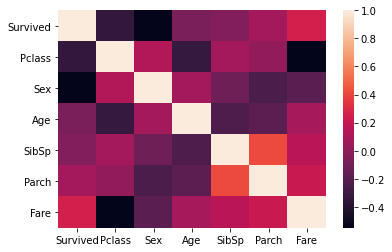

In [18]:
sns.heatmap(train_df.corr())

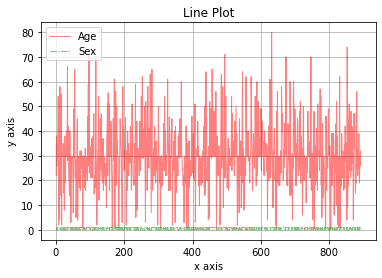

In [19]:
train_df.Age.plot(kind = "line", color = "r", label = "Age", linewidth = 1, alpha = 0.5, grid = "True", linestyle = "-")
train_df.Sex.plot(kind = "line", color = "g", label = "Sex", linewidth = 1, alpha = 0.5, grid = "True", linestyle = "-.")
plt.legend(loc = "upper left")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Plot")
plt.show()

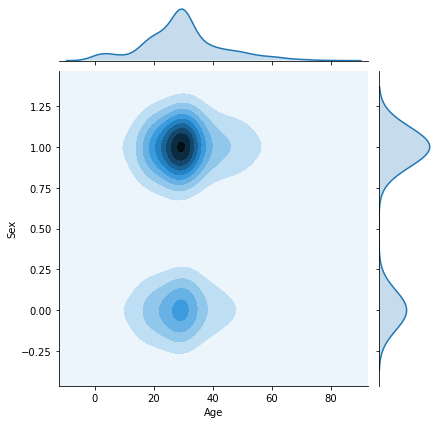

In [20]:
sns.jointplot(x=train_df["Age"], y=train_df["Sex"], kind='kde')

# 5) Model Defining using Logistic Regression

In [21]:
X_train = train_df.drop(['Survived'],axis=1)
y_train = train_df[['Survived']].values

In [22]:
logi = LogisticRegression()

In [23]:
logi.fit(X_train,y_train)

C:\Program Files\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

# 6) Final Prediction of Model

In [24]:
predict = logi.predict(test_df)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [25]:
Prediction = pd.DataFrame(predict)
Prediction.head(10)

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [26]:
Prediction[0].unique()

array([0, 1], dtype=int64)

In [27]:
Prediction.replace([0, 1],['No','Yes'],inplace=True)

# 7) Making a Seprate CSV file Of prediction

In [28]:
import os

In [29]:
Prediction.to_csv('Prediction.csv')